In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

# Функция Розенброка

In [35]:
count = 0
def RosenbrockFunction(x):
    """The Rosenbrock function"""
    global count
    count = count + 1
    return np.sum(100.0*(x[1:]**2.0-x[:-1])**2.0 + (x[1:]-1)**2.0, axis=0)


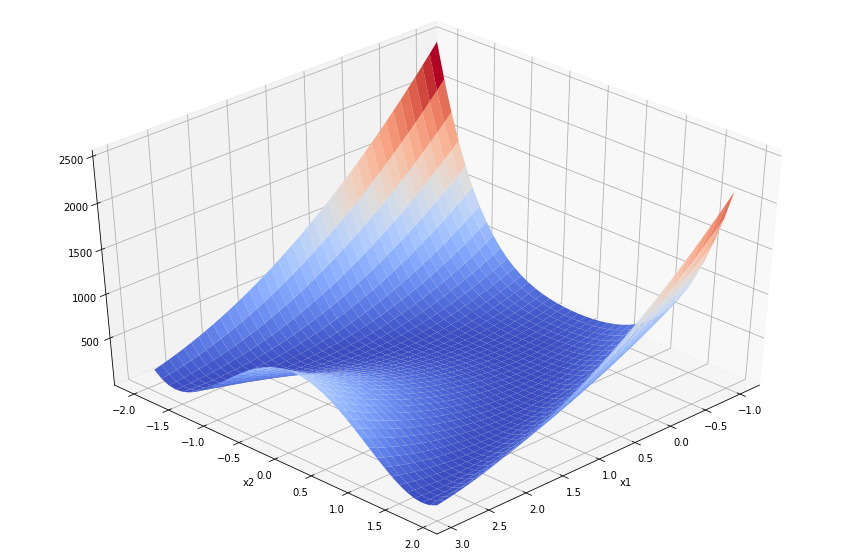

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Настраиваем 3D график
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')

# Задаем угол обзора
ax.view_init(40, 45)

# Создаем данные для графика
Y = np.arange(-2, 2, 0.1)
X = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = RosenbrockFunction(np.array([X,Y]))


plt.xlabel('x1')
plt.ylabel('x2')

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

plt.show()

**REAL MINIMUM**
fun = 2.8439854262904333e-11
x( 0.99999467 ,
   0.99998932)

## Градиент функции численными методами
__в программе использовать dif__

In [37]:
#правая производная
def dif(function, x):
    global type_dif
    type_dif = "right"
    
    global h
    h = 0.01
    H = np.array([h, h])
    e1 = np.array([1, 0])
    e2 = np.array([0,1])
    
    RD = []    
    RD1 = (1/h)*(function(x + H*e1) - function(x))
    RD2 = (1/h)*(function(x + H*e2) - function(x))
    
    RD.append(RD1)
    RD.append(RD2)
    return np.array(RD)    

#левая производная
def l_dif(function, x):
    global type_dif
    type_dif = "left"
    
    global h
    h = 0.0000001
    H = np.array([h, h])
    e1 = np.array([1, 0])
    e2 = np.array([0,1])
    
    LD = []    
    LD1 = (1/h)*(function(x) - function(x - H*e1))
    LD2 = (1/h)*(function(x) - function(x - H*e2))
    
    LD.append(LD1)
    LD.append(LD2)
    return np.array(LD)  

#центральная производн
def с_dif(function, x):
    global type_dif
    type_dif = "central"
    
    global h
    h = 0.0000001
    H = np.array([h, h])
    e1 = np.array([1, 0])
    e2 = np.array([0,1])
    
    CD = []    
    CD1 = (1/(2*h))*(function(x + H*e1) - function(x - H*e1))
    CD2 = (1/(2*h))*(function(x + H*e2) - function(x - H*e2))
    
    CD.append(CD1)
    CD.append(CD2)
    return np.array(CD)  

## Метрика 
_файл: metrics.py_

In [38]:
def delt_x(X1, X2):
    X1 = np.array(X1)
    X2 = np.array(X2)
    return np.array(X1-X2)

def delt_g(X1, X2):
    F1 = np.array(dif(RosenbrockFunction, X1))
    F2 = np.array(dif(RosenbrockFunction, X2))
    return np.array(F1 - F2)

def multiplication_matrix(x1, x2):
    a = []
    b = []
    c = []
    
    b.append(x1[0]*x2[0])
    b.append(x1[0]*x2[1])

    a.append(b)
    
    c.append(x1[1]*x2[0])
    c.append(x1[1]*x2[1])
    a.append(c)
    
    return a


def metrics(x1, x2, old_metrics):
    I = np.eye(2)    
    m1 = I - (multiplication_matrix(delt_x(x1, x2), delt_g(x1, x2)) / np.dot(delt_x(x1, x2), delt_g(x1, x2)))
    m2 = multiplication_matrix(delt_x(x1, x2), delt_x(x1, x2)) / np.dot(delt_x(x1, x2), delt_g(x1, x2))    
    m3 = np.dot(np.dot(m1, old_metrics), m1)
    return m3 + m2

# Итерации 


Для ДСК а = 0.07
Для золотого сечения а = 0.5

In [39]:
def delta_lamda(x, S):
    a = 0.1
    return (a * np.linalg.norm(x)/np.linalg.norm(S))

def New_lamda(l, k, delta):
    return l + pow(2, k)*delta

def transform_x (X, lamda, S):
    X = np.array(X)
    S = np.array(S) * lamda
    return S + X

Алгоритм Свенна

In [40]:
def svenmeth(S, function, x0):
    a = 0
    b = 0
    lambda_0 = 0
    
    delta = round(delta_lamda(x0, S), 4)
    
    F = function(x0)
    F_minus = function(transform_x(x0, lambda_0 - delta, S))
    F_plus = function(transform_x(x0, lambda_0 + delta, S))

    
    if (F <= F_minus) and (F <= F_plus):
        a = lambda_0 - delta
        b = lambda_0 + delta
    elif F_minus < F and F > F_plus:
        print ("The function is not unimodal!")
    else:
        if F_minus < F and F < F_plus:
            delta = - delta

        k = 0
        old_lamda = lambda_0
        now_lamda = lambda_0 + delta
        while True:
            k = k + 1
            new_lamda = New_lamda(now_lamda, k, delta)
            if function(transform_x(x0, now_lamda, S)) < function(transform_x(x0, new_lamda, S)):
                half_lamda = (new_lamda + now_lamda)*(1/2)
                if half_lamda > old_lamda:
                    a = old_lamda
                    b = half_lamda
                else:
                    a = half_lamda
                    b = old_lamda
                break
            old_lamda = now_lamda
            now_lamda = new_lamda
    return a, b

ДСК- Паулла

In [41]:
def calculation_func(lamda1, lamda2, lamda3, S, function, x0):
    func1 = function(transform_x(x0, lamda1, S))
    func2 = function(transform_x(x0, lamda2, S))
    func3 = function(transform_x(x0, lamda3, S))
    return func1, func2, func3

def dskmeth(S, function, x):
    
    a, b = svenmeth(S, function, x) 
       
    la1 = a
    la2 = (a+b)/2
    la3 = b
    del_la = (b - a)/2

    f1, f2, f3 = calculation_func(la1, la2, la3, S, function, x)

    sp_la = la2 + (del_la * (f1 - f3))/(2* (f1 - 2*f2 + f3 ))
    f_sp_la = round(function(transform_x(x, sp_la, S)), 5)

    if sp_la < la2:
        la3 = la2
    elif sp_la > la2:
        la1 = la2

    la2 = sp_la
    f1, f2, f3 = calculation_func(la1, la2, la3, S, function, x)

    A1 = (f2 - f1)/(la2 - la1)
    A2 = (1/(la3-la2))*(((f3-f1)/(la3-la1))-((f2-f1)/(la2 - la1)))

    sp_la = ((la1 + la2)/2) - (A1/(2*A2))
    return sp_la

Золотое сечение

In [42]:
def goldrotatiometh(eps, S, function, x0):
    a, b = svenmeth(S, function, x0)
    k = 0
    L = b - a
    co = 0
    
    while math.fabs(L) > eps:
        k += 1
        l_1 = a + (0.382)*L
        l_2 = a + (0.618)*L

        if function(transform_x(x0, l_1, S)) <= function(transform_x(x0, l_2, S)):
            b = l_2
        else:
            a = l_1
        L = b - a
        co = co + 1
    la = (b + a)/2
    return la

In [43]:
MATRIX_steps = []
MATRIX_X = []
MATRIX_F = []
MATRIX_count = []

count = 0
count_restart = 0 
i = 0 

eps = 0.001
eps1 = 0.001
eps2 = 0.001

old_x = np.array([-1.2, 0])


METRICS = np.eye(2)
DIRECTION = np.array((-1)*dif(RosenbrockFunction, old_x))
#STEP = goldrotatiometh(eps, DIRECTION, RosenbrockFunction, old_x)
STEP = dskmeth(DIRECTION, RosenbrockFunction, old_x)
current_x = np.array(old_x + STEP*DIRECTION)

while True:
    
    
    #Критерий окончания: норма градиента
#     check_G = np.linalg.norm(delt_g(current_x, old_x))
#     if сheck_G < eps1:
#         min_x = current_x
#         min_f = RosenbrockFunction(current_x)
#         break   

    
    
    #Критерий окончания: абсолютная разница функции
    сheck_X = np.linalg.norm(delt_x(current_x, old_x))
    check_F = math.fabs((RosenbrockFunction(current_x) - RosenbrockFunction(old_x)))
    
    if сheck_X < eps1 and check_F < eps1:
        min_x = current_x
        min_f = RosenbrockFunction(current_x)
        break
    
    MATRIX_count.append(count)   
    count = 0
    
    MATRIX_steps.append(STEP)
    MATRIX_X.append(old_x)
    MATRIX_F.append(RosenbrockFunction(old_x))
    
    METRICS = metrics(current_x, old_x, METRICS)
    DIRECTION = np.array((-1) * np.dot(METRICS, dif(RosenbrockFunction, current_x)))
    #STEP = goldrotatiometh(eps, DIRECTION, RosenbrockFunction, current_x)
    STEP = dskmeth(DIRECTION, RosenbrockFunction, old_x)
    
    if (STEP < 0): 
        
        count_restart = count_restart + 1
        
        METRICS = np.eye(2)
        DIRECTION = np.array((-1) * np.dot(METRICS, dif(RosenbrockFunction, current_x)))
        STEP = goldrotatiometh(eps, DIRECTION, RosenbrockFunction, current_x)

    new_x = np.array(current_x + STEP*DIRECTION)
    
    old_x = current_x
    current_x = new_x
    
    i = i + 1


# Result

Количество итераций метода:  19
Количесто вызовов функции:  1034
Количество рестратов:  9
Минимум в точке: [0.94739954 0.97342987]
Минимум функции: 0.0007087330325356041


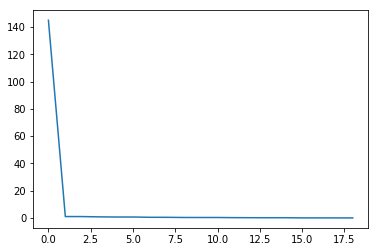

In [44]:
print("Количество итераций метода: ", i)
print("Количесто вызовов функции: ", sum(MATRIX_count))
print("Количество рестратов: ", count_restart)

print("Минимум в точке:", min_x)
print("Минимум функции:", min_f)

plt.plot(MATRIX_F)

In [45]:
dc = pd.DataFrame({"Steps": MATRIX_steps , "X": MATRIX_X, "F": MATRIX_F, "count calculating function": MATRIX_count})
dc

,Steps,X,F,count calculating function
0,0.005021,"[-1.2, 0.0]",145.000000,22
1,0.003948,"[-1.2832177525234911e-05, -0.002059057479175609]",1.004122,41
2,0.167244,"[4.6222164118682686e-05, 0.005806636798869837]",0.988420,61
3,0.572718,"[0.0005612318279896941, 0.16671950813564446]",0.768526,53
4,0.039569,"[0.023705094154276064, 0.2086368507785477]",0.665556,43
5,0.741155,"[0.024930872982169824, 0.19461335275514455]",0.665401,47
6,0.003903,"[0.0997858990992024, 0.34325666849106956]",0.463853,70
7,0.829134,"[0.1099650598298128, 0.33664233260671483]",0.441174,45
8,0.089319,"[0.18035137250973476, 0.43809229065583405]",0.329135,41
9,-0.017700,"[0.1938892032265288, 0.4451367556596136]",0.309686,74


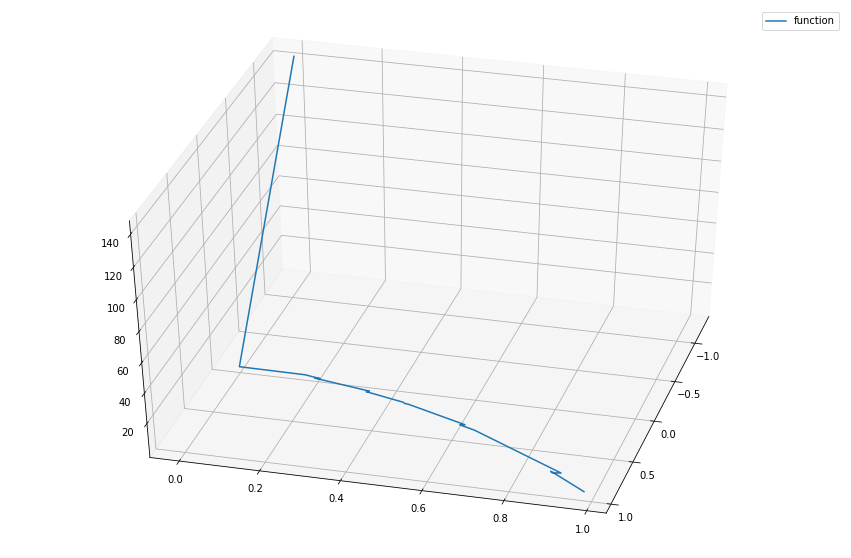

In [46]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')

ax.view_init(40, 15)

x1 = []
x2 = []
for i in range(len(MATRIX_X)):
    x1.append(MATRIX_X[i][0])
    x2.append(MATRIX_X[i][1])
z = MATRIX_F

ax.plot(x1, x2, z, label = 'function')
ax.legend()

plt.show()

Градиенты функций ручками

In [47]:

# def RosenbrockFunction(x):
#     global count
#     count = count + 1
#     return np.sum((x[1:]-1)**2 + (x[:-1] - 1)**2)

# def GradientRosenbrockFunction(x):
#     """The Rosenbrock function's gradient"""
#     xm = x [1: -1]
#     xm_m1 = x [: - 2]
#     xm_p1 = x [2:]
#     der = np.zeros_like (x)
#     der [1: -1] = 200 * (xm-xm_m1 ** 2) - 400 * (xm_p1 - xm ** 2) * xm - 2 * (1-xm)
#     der [0] = -400 * x [0] * (x [1] -x [0] ** 2) - 2 * (1-x [0])
#     der [-1] = 200 * (x [-1] -x [-2] ** 2)
#     return der



# def GradientRosenbrockFunction(x):
#     der = []
#     der.append(2*(x[0]-1))
#     der.append(2*(x[1]-1))
#     return np.array(der)

Поиск шага через формулу и матрицу гессе

In [6]:
def step(x, S):
    H = [[400*(3*x[0]**2-x[1])+2 , -400*x[0]],[-400*x[0], 200]]
    return (-1) * np.dot(GradientRosenbrockFunction(x), S) / np.dot(np.dot(S, H), S)